# 1. Tidy Data 만들기

- 각 변수 (컬럼)는 각각의 열에 분리, 배치
- 각 관측치는 각각의 행에 분리, 배치
- 각 값은 개별 셀에 배치되야 한다

pew.csv

미국의 퓨리서치센터의 소득, 종교의 관계를 나타내는 데이터

wide data -> long data


In [50]:
import pandas as pd

In [51]:
pew_df = pd.read_csv('./data/pew.csv')
pew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [52]:
pew_df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [53]:
pew_df.tail(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
16,Other World Religions,5,2,3,4,2,7,3,4,4,8
17,Unaffiliated,217,299,374,365,341,528,407,321,258,597


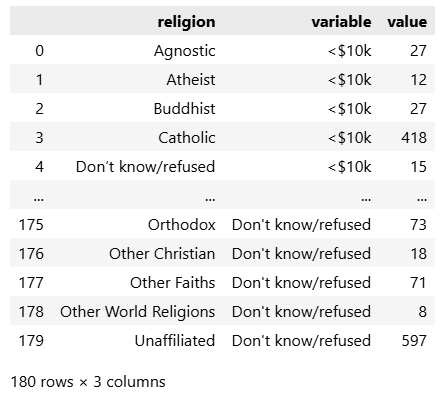

long data 로 만들기


In [54]:
pew_df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


# melt()

- id_vars : 유지할 변수 리스트(튜플, 행렬)
- value_vars : 피봇 되돌리기 값으로 쓰일 열 목록
- var_name : 만들어지는 새 컬럼의 이름
- value_name : 새 컬럼의 값의 컬럼 이름

In [55]:
pew_df.melt(id_vars='religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [56]:
pew_df.melt(id_vars='religion',
            var_name='income',
            value_name='count'
            )

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


billboard.csv

여러개의 열을 이용한 melt

In [57]:
billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   week          317 non-null    object 
 6   rating        317 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 17.5+ KB


In [58]:
billboard_df.head(3)

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0


In [59]:
id_vars = ['year', 'artist','track', 'time', 'date.entered' ]

b_melt_df = billboard_df.melt(id_vars=id_vars, var_name='week', value_name='rating')
b_melt_df.head()

ValueError: value_name (rating) cannot match an element in the DataFrame columns.

country_timeseries.csv

In [ ]:
data_file_name = 'country_timeseries.csv'
ebola_df = pd.read_csv('./data/'+data_file_name)
ebola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [ ]:
ebola_df.iloc[:5, [0,1,2,10]]

,Date,Day,Cases_Guinea,Deaths_Guinea
0,1/5/2015,289,2776.0,1786.0
1,1/4/2015,288,2775.0,1781.0
2,1/3/2015,287,2769.0,1767.0
3,1/2/2015,286,NaN,NaN
4,12/31/2014,284,2730.0,1739.0


In [ ]:
#1. 값 Cases~, Deaths~  id: Date, Day
ebola_long = ebola_df.melt(id_vars=['Date','Day'])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [ ]:
#2. column 값을 2개로 분할
variable_split = ebola_long['variable'].str.split('_')
type(variable_split)

pandas.core.series.Series

In [ ]:
variable_split[:5]

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object

In [ ]:
variable_split[0][0]

'Cases'

In [ ]:
status_values = variable_split.str.get(0) #cases, death
country_values = variable_split.str.get(1) #country
type(status_values)

pandas.core.series.Series

In [ ]:
status_values

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [ ]:
#3. 컬럼 추가
ebola_long['status'] = status_values
ebola_long['country'] = country_values
ebola_long[:5]

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


1~3 번을 빠르게 만들기

In [ ]:
ebola_long_1 = ebola_df.melt(id_vars=['Date','Day'])
variable_split1= ebola_long_1['variable'].str.split('_', expand=True)
ebola_long_1[['status', 'country']] = variable_split1
ebola_long_1.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


weather.csv

In [61]:
weather_df = pd.read_csv('./data/weather.csv')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       22 non-null     object 
 1   year     22 non-null     int64  
 2   month    22 non-null     int64  
 3   element  22 non-null     object 
 4   d1       2 non-null      float64
 5   d2       4 non-null      float64
 6   d3       4 non-null      float64
 7   d4       2 non-null      float64
 8   d5       8 non-null      float64
 9   d6       2 non-null      float64
 10  d7       2 non-null      float64
 11  d8       2 non-null      float64
 12  d9       0 non-null      float64
 13  d10      2 non-null      float64
 14  d11      2 non-null      float64
 15  d12      0 non-null      float64
 16  d13      2 non-null      float64
 17  d14      4 non-null      float64
 18  d15      2 non-null      float64
 19  d16      2 non-null      float64
 20  d17      2 non-null      float64
 21  d18      0 non-nul

In [63]:
weather_df

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [65]:
# 1. Day 언피벗 melt()
id_vars = ['id', 'year','month', 'element']

weather_melt= weather_df.melt(id_vars=id_vars, var_name='day', value_name='temp')
weather_melt.head(2)

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN


In [70]:
# 2. element를 피봇팅 -. tmax, tmin 컬럼 생성
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year','month','day'],
    columns= 'element',
    values='temp'
)
weather_tidy.head()

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4

In [71]:
weather_tidy_flat = weather_tidy.reset_index()
weather_tidy_flat.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


In [72]:
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year','month','day'],
    columns= 'element',
    values='temp'
).reset_index()
weather_tidy.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
